Hello World Program :  Create the simplest quantum entangled state (Bell state):

A closest source can be found at :https://qiskit.org/documentation/intro_tutorial1.html

In this simple program we learn how to build simple quntum circuit and run it on simulator backend. 

When using Qiskit a user workflow nominally consists of following four high-level steps:

    Build: Design a quantum circuit(s) that represents the problem you are considering.

    Compile: Compile circuits for a specific quantum service, e.g. a quantum system or classical simulator.

    Run: Run the compiled circuits on the specified quantum service(s). These services can be cloud-based or local.

    Analyze: Compute summary statistics and visualize the results of the experiments.


Step 1 : Import Packages

In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

In more detail, the imports are

    QuantumCircuit: can be thought as the instructions of the quantum system. It holds all your quantum operations.

    QasmSimulator: is the Aer high performance circuit simulator.

    plot_histogram: creates histograms.


Step 2 : Initialize Variables

Here, we are initializing with 2 qubits in the zero state; with 2 classical bits set to zero; and circuit is the quantum circuit.

In [3]:
circuit=QuantumCircuit(2,2)

In [4]:
circuit.draw()

q_0: 
     
q_1: 
     
c: 2/

we have the option to visualize how the quantum circuit looks by running the following command

Step 3 : Add Gates

Lets see what happens when we apply a gate. Here we start with Hadmard gate which creates superposition of two qubit

In [5]:
circuit.h(0)

Let us perform an entangling gate. We start with controlled-Not operation (𝐶𝑁𝑂𝑇) on control qubit 0 and target qubit 1, putting the qubits in an entangled state.

In [6]:
circuit.cx(0,1)

Step 4 : Visualize the Circuit 

You can use qiskit.circuit.QuantumCircuit.draw() to view the circuit that you have designed in the various forms used in many textbooks and research articles.

In [7]:
circuit.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════

The default backend for QuantumCircuit.draw() or qiskit.visualization.circuit_drawer() is the text backend. However, depending on your local environment you may want to change these defaults to something better suited for your use case.For example, a settings.conf file for setting a Matplotlib drawer is:

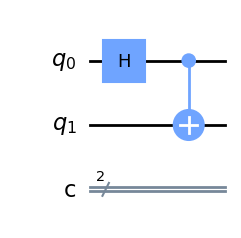

In [8]:
circuit.draw(output='mpl')

Congradualtion you have created the Bell state: |𝜓⟩=(|00⟩+|11⟩)/2

Now we can extract the outputs by using .measure() function in Qiskit. In this example, the classical bits will be used to store the outputs

In [9]:
circuit.measure([0],[0])

In [10]:
circuit.draw()

┌───┐     ┌─┐
q_0: ┤ H ├──■──┤M├
     └───┘┌─┴─┐└╥┘
q_1: ─────┤ X ├─╫─
          └───┘ ║ 
c: 2/═══════════╩═
                0

In [11]:
circuit.measure([1],[1])

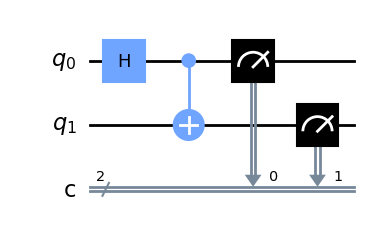

In [12]:
circuit.draw(output='mpl')

or directly

In [220]:
#circuit.measure([0,1],[0,1])

In [221]:
#circuit.draw(output='mpl')

Step 5 : Simulate the Experiment

Qiskit Aer is a high performance simulator framework for quantum circuits. It provides several backends to achieve different simulation goals. If you have issues installing Aer, you can alternatively use the Basic Aer provider by replacing Aer with BasicAer. Basic Aer is included in Qiskit Terra.

To simulate this circuit, you will use the qasm_simulator. Each run of this circuit will yield either the bit string 00 or 11.

In [21]:
simulator = QasmSimulator()
#compiled_circuit = transpile(circuit, simulator)
#job = simulator.run(compiled_circuit, shots=1000)
job = simulator.run(circuit, shots=1000)

Lets check the results:

In [22]:
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'00': 496, '11': 504}


In [23]:
#result

As expected, the output bit string is 00 approximately 50 percent of the time. The number of times the circuit is run can be specified via the shots argument of the execute method. The number of shots of the simulation was set to be 1000 (the default is 1024)

Step 6 : Visualize the Results

Qiskit provides many visualizations,

including the function plot_histogram, to view your results.

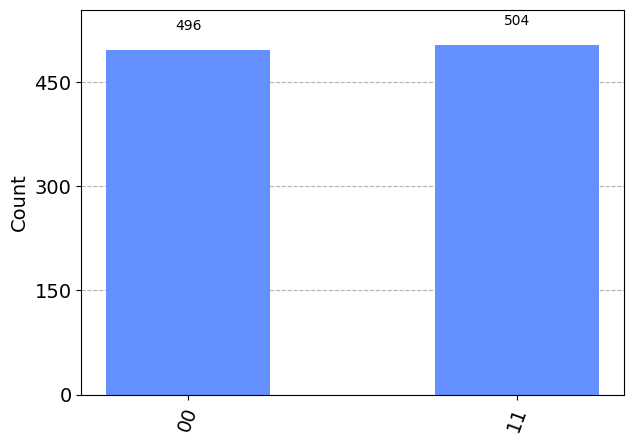

In [24]:
plot_histogram(counts)